In [1]:
  # define rooms and items

# SALA 1 THE DARK GROTTO 

#room
the_dark_grotto = {
    "name": "the dark grotto",
    "type": "room"
}

#items
torch = {
    "name": "torch",
    "type": "item"
}

fragment_of_a_map = {
    "name": "fragment of a map",
    "type": "item"
}

luminous_stone = {
    "name": "luminous stone",
    "type": "item"
}

crack_in_wall = {
    "name": "crack in the wall",
    "type": "place"
}

#access
the_passage_of_bones = {
    "name": "the passage",
    "type": "door"
}

#key
grotto_key = {
  "name": "grotto key",
  "type": "key",
  "target": the_passage_of_bones
}

# SALA 2 CHAMBER OF BONES

#Room
the_chamber_of_bones = {
    "name": "the chamber of bones",
    "type": "room"
}

#items
suspicious_closet = {
    "name": "suspicious closet",
    "type": "enemy"
}

rusty_sword = {
  "name": "rusty sword",
  "type": "item"
}

broken_hourglass = {
  "name": "broken hourglass",
  "type": "item"
}

locked_chest = {
  "name": "locked chest",
  "type": "item"
}

#access

the_lava_bridge = {
    "name": "the lava bridge",
    "type": "door"
}

the_cursed_hall = {
    "name": "the cursed hall",
    "type": "door"
}

#key
chamber_key = {
  "name": "chamber key",
  "type": "key",
  "target": the_lava_bridge
}

#enemies
skeleton_guardian = {
  "name": "skeleton guardian",
  "type": "enemy"
}

# SALA 3 LAKE OF FIRE

#room
lake_of_fire = {
    'name': 'the lake of fire',
    'type': 'room',
}

#items

magical_chalice = {
    'name': 'magical chalice',
    'type': 'item',
}

ancient_scroll = {
    "name": "ancient scroll",
    "type": "item"
}
#key
cursed_throne_key = {
    'name': 'key for the cursed throne room',
    'type': 'key',
    'target': the_cursed_hall,
}

# SALA 4 THE CURSED THRONE 

#room 
cursed_throne = {
    "name": "cursed throne",
    "type": "room",
}

#access = door

cursed_hall = {
    "name": "the cursed Hall",
    "type": 'door'
}

the_portal_altar = {
    'name': 'the portal altar access',
    'type': 'door'
}

#items

shadow_amulet = {
    "name": "shadow amulet",
    "type": "item",
}

enchanted_shield = {
    "name": "enchanted shield",
    "type": "item",
}

#keys

portal_altar_key = {
    "name": "key for the portal altar",
    "type": "key",
    "target": the_portal_altar
}


# THE PORTAL OF DESTINY (OUTSIDE)

outside = {
    'name': 'outside',
}


#Meter aqui todas las habitaciones
all_rooms = [the_dark_grotto, the_chamber_of_bones, lake_of_fire, cursed_throne, outside]

all_doors = [the_passage_of_bones,the_lava_bridge, cursed_hall, the_portal_altar]

# define which items/rooms are related

object_relations = {
    "the dark grotto": [torch, fragment_of_a_map, luminous_stone, crack_in_wall, the_passage_of_bones],
    "crack in the wall": [grotto_key],
    "the passage": [the_dark_grotto, the_chamber_of_bones],
    "suspicious closet": [skeleton_guardian],
    "the chamber of bones": [suspicious_closet, rusty_sword, broken_hourglass, locked_chest, the_passage_of_bones, the_lava_bridge, the_cursed_hall, skeleton_guardian],
    #"skeleton guardian": [outside],
    "locked chest": [chamber_key],
    "the lava bridge": [the_chamber_of_bones, lake_of_fire],
    "the cursed hall": [the_chamber_of_bones, cursed_throne],
    "the lake of fire": [magical_chalice, ancient_scroll, the_lava_bridge],
    "magical chalice": [cursed_throne_key],
    "cursed throne": [shadow_amulet, enchanted_shield, the_portal_altar],
    "shadow amulet": [portal_altar_key],
    "the portal altar access": [cursed_throne, outside],
    "outside": [the_portal_altar]
}

# define game state. Do not directly change this dict.
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This
# way you can replay the game multiple times.

INIT_GAME_STATE = {
    "current_room": the_dark_grotto,
    "keys_collected": [],
    "target_room": outside,
    #"run_away": the_dark_grotto
}

In [2]:
from IPython.display import Image, display

def show_image(image_url):
    display(Image(image_url))    

def linebreak():
    """
    Print a line break
    """
    print("\n\n")

def start_game():
    """
    Start the game
    """

    show_image("image.jpg")

    
    print("""

\n
    \t\tNimbar, a gnome elf outcast in his homeland, has always been considered strange and ugly by his peers.
    
    \t\tIn search of acceptance and adventure, he ventured into the forbidden forest after hearing about a magical
    
    \t\tplant that could transform his appearance.
    
    \t\tHowever, while exploring the hidden cave where it was said to grow, he accidentally triggered an ancient 
    
    \t\tportal that transported him to the Underworld, a place filled with terrifying creatures and deadly traps.
    
    \t\tHe finds himself in a situation where courage and cleverness will become crucial to escape the darkness and
    
    \t\tfulfill his destiny.
    
    \t\tHe finds a passage, but mountains of bones disable the path. You notice a torch nearby…
    
    \n
""")
    

    play_room(game_state["current_room"])

def play_room(room):
    """
    Play a room. First check if the room being played is the target room.
    If it is, the game will end with success. Otherwise, let player either
    explore (list all items in this room) or examine an item found here.
    """
    game_state["current_room"] = room
    if(game_state["current_room"] == game_state["target_room"]):
        print("Congrats! You escaped the room!")
    
    #elif(game_state['current_room'] == game_state['game_over']):        #testear codigo
        #print("You run away.")
        
    else:
        print("You are now in " + room["name"])
        intended_action = input("What would you like to do? Type 'explore' or 'examine'?").strip()
        if intended_action == "explore":
            explore_room(room)
            play_room(room)
        elif intended_action == "examine":
            examine_item(input("\nWhat would you like to examine?").strip())
        else:
            print("Not sure what you mean. Type 'explore' or 'examine'.")
            play_room(room)
        linebreak()

def explore_room(room):
    """
    Explore a room. List all items belonging to this room.
    """
    items = [i["name"] for i in object_relations[room["name"]]]
    print("You explore the room. This is " + room["name"] + ". You find " + ", ".join(items))

def get_next_room_of_door(door, current_room):
    """
    From object_relations, find the two rooms connected to the given door.
    Return the room that is not the current_room.
    """
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            return room

#funcion creada
#def run_away():
    #print("You are so scared and run away back to the first instance.")
    #play_room(object_relations["the dark grotto"])

def examine_item(item_name):
    """
    Examine an item which can be a door or furniture.
    First make sure the intended item belongs to the current room.
    Then check if the item is a door. Tell player if key hasn't been
    collected yet. Otherwise ask player if they want to go to the next
    room. If the item is not a door, then check if it contains keys.
    Collect the key if found and update the game state. At the end,
    play either the current or the next room depending on the game state
    to keep playing.
    """
    current_room = game_state["current_room"]
    next_room = ""
    output = None

    for item in object_relations[current_room["name"]]:
        if(item["name"] == item_name):
            output = "You examine " + item_name + ". "
            if(item["type"] == "door"):
                have_key = False
                for key in game_state["keys_collected"]:
                    if(key["target"] == item):
                        have_key = True
                if(have_key):
                    output += "You unlock it with a key you have."
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    output += "It is locked but you don't have the key."
                    
            #CODIGO IMPLEMENTADO 
            elif (item["type"] == "enemy"):
                print("You find an skeleton, you got scare and run away back!")
                current_room = the_dark_grotto                           
                            
            else:
                if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You find " + item_found["name"] + "."
                else:
                    output += "There isn't anything interesting about it."
            print(output)
            break

    if(output is None):
        print("The item you requested is not found in the current room.")

    if(next_room and input("Do you want to go to the next room? Ener 'yes' or 'no'").strip() == 'yes'):
        play_room(next_room)
    else:
        play_room(current_room)

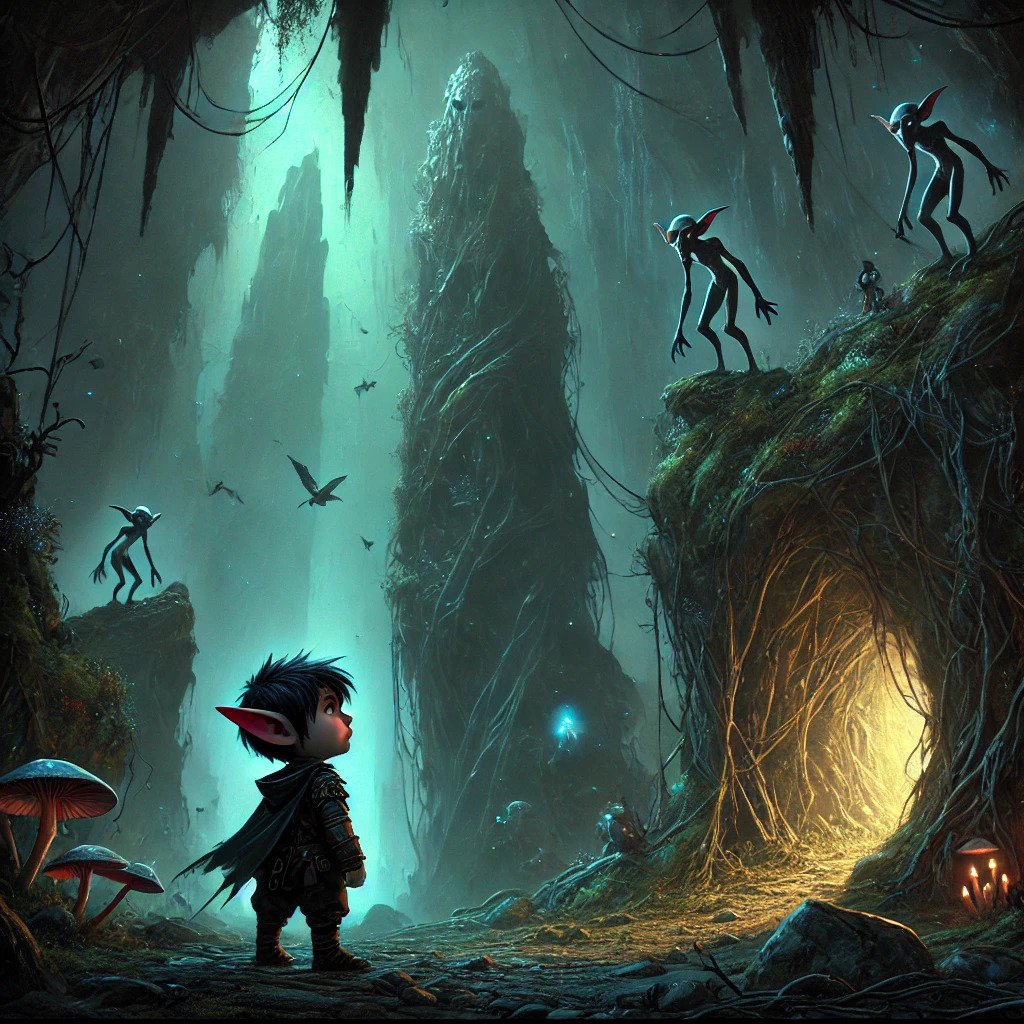





    		Nimbar, a gnome elf outcast in his homeland, has always been considered strange and ugly by his peers.
    
    		In search of acceptance and adventure, he ventured into the forbidden forest after hearing about a magical
    
    		plant that could transform his appearance.
    
    		However, while exploring the hidden cave where it was said to grow, he accidentally triggered an ancient 
    
    		portal that transported him to the Underworld, a place filled with terrifying creatures and deadly traps.
    
    		He finds himself in a situation where courage and cleverness will become crucial to escape the darkness and
    
    		fulfill his destiny.
    
    		He finds a passage, but mountains of bones disable the path. You notice a torch nearby…
    
    


You are now in the dark grotto


What would you like to do? Type 'explore' or 'examine'? explore


You explore the room. This is the dark grotto. You find torch, fragment of a map, luminous stone, crack in the wall, the passage
You are now in the dark grotto


What would you like to do? Type 'explore' or 'examine'? examine

What would you like to examine? luminous stone


You examine luminous stone. There isn't anything interesting about it.
You are now in the dark grotto


What would you like to do? Type 'explore' or 'examine'? crack in the wall


Not sure what you mean. Type 'explore' or 'examine'.
You are now in the dark grotto


What would you like to do? Type 'explore' or 'examine'? examine

What would you like to examine? crack in the wall


You examine crack in the wall. You find grotto key.
You are now in the dark grotto


What would you like to do? Type 'explore' or 'examine'? examine

What would you like to examine? the passage


You examine the passage. You unlock it with a key you have.


Do you want to go to the next room? Ener 'yes' or 'no' yes


You are now in the chamber of bones


What would you like to do? Type 'explore' or 'examine'? explore


You explore the room. This is the chamber of bones. You find suspicious closet, rusty sword, broken hourglass, locked chest, the passage, the lava bridge, the cursed hall, skeleton guardian
You are now in the chamber of bones


What would you like to do? Type 'explore' or 'examine'? examine

What would you like to examine? suspicious closet


You find an skeleton, you got scare and run away back!
You examine suspicious closet. 
You are now in the dark grotto


In [ ]:
game_state = INIT_GAME_STATE.copy()

start_game()